<a href="https://colab.research.google.com/github/lstarke/eds-timeseries/blob/main/EDS_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O que são séries temporais ?

Séries temporais são uma sequência de observações registradas em instervalos de tempo regulares (como dias, semanas, meses ou anos) e que são usados para analisar e prever tendências e padrões em eventos ou fenômenos que mudam ao longo do tempo.

As séries temporais podem ser:

* Univariadas: consistem em uma única variável, como o preço de uma ação ao longo do tempo.
* Multivariadas consistem em várias variáveis, como temperatura, umidade e precipitação ao longo do tempo em uma determinada região.





# Por que séries temporais são diferentes de problemas de regressão ?

Por que em regressões são desconsideradas as dimensões de tempo.

Na maioria dos problemas de regressãoas informações coletadas em um ponto no tempo não influenciam as informações coletadas em outro ponto no tempo.

Em uma série temporal, as observações são geralmente dependentes do tempo, o que significa que as informações coletadas em um momento podem influencial as informações coletadas em outro momento.



# Quais são os objetivos ao utilizar séries temporais ?

* Identificar padrões
    
    * Identificar a natureza do fenômeno representado pela sequência de observações.

    * A análise de padrões em séries temporais é importante por que pode ajudar a entender o comportamento da variável ao longo do tempo e a prever o seu comportamento futuro.

    * Algumas técnicas estatísticas que podem identificar padrões em séries temporais são: modelos de suavização, modelos ARIMA (Autoregressive Integrated Moving Average),modelos de redes neurais, entre outros.

* Fazer previsões

    * Modelos treinados com dados históricos de séries temporais utilizam estas informações para fazer previsões sobre os valores futuros da série.

    * As previsões obtidas a partir de modelos de séries temporais podem ser úteis em diversos campos, como previsão de demanda, previsão de vendas, fluxo de tráfego entre outros.
    




# Componentes de uma Série Temporal

1. Tendência

        É a direção geral em que algo está se desenvolvendo ou mudando. Assim, podemos ter uma tendência de alta ou de baixa
        em nossa série temporal.      
         
<p align=center>        
<img width="90%" src="https://www.abgconsultoria.com.br/blog/wp-content/uploads/series-temporais-2-1024x644.png"></p>

1. Sazonalidade

        É qualquer mudança ou padrão previsível em uma série temporal
        que seja recorrente ou se repita ao longo de um determinado período de tempo. Ex.: aumento das vendas de roupa de praia
        no verão;

<p align=center>
<img width="90%" src="https://5ce827599a409a488a3c361c.static-01.com/l/images/21ba213ec718e7d972b4fbbc9111217d8d9fc75e.png"></p>

        

## Importação de pacotes

In [2]:
# importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# define um estilo único para todos os gráficos do seaborn
sns.set_style()

# melhora a qualidade do gráfico
%config InlineBackend.figure_format = 'svg'

# permite que figuras geradas pelo matplotlib sejam salvas juntas com o notebook
%matplotlib inline

## Carregando dados

O dataset utilizado nesta aula são de dados referente a consumo de energia elétrica.

In [3]:
# armazenando o endereço do dataset em uma variável
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# importando os dados do CSV para uma variável do tipo DataFrame
df = pd.read_csv(dataset_path)

# imprimindo as 5 primeiras linhas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


## Convertendo datas pata Datetime

In [4]:
# convertende a coluna DATE para o tipo datetime e atribuindo para o index do DataFrame
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# removendo a coluna DATE do DataFrame
df.drop("DATE", inplace=True, axis=1) # 0 == eixo X (linha), 1 == eixo Y (coluna)

# imprimindo as 5 primeiras linhas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## Visualizando Séries Temporais

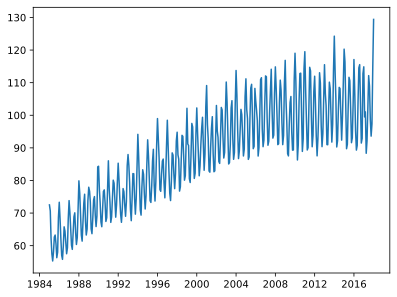

In [5]:
# imprimindo gráfico de linhas
plt.plot(df.index, df.Value);

## Decompor uma Time Series em seus componentes

Para isso utilizaremos a biblioteca StatsModels que fornece uma ampla gama de métodos estatísticos.

Uma das funcionalidades desta biblioteca é decompor uma série temporal em seus componentes. Esta decomposição é util para identificar e separar os diferentes elementos presentes em uma série temporal, como tendência, sazonalidade e componentes residuais.

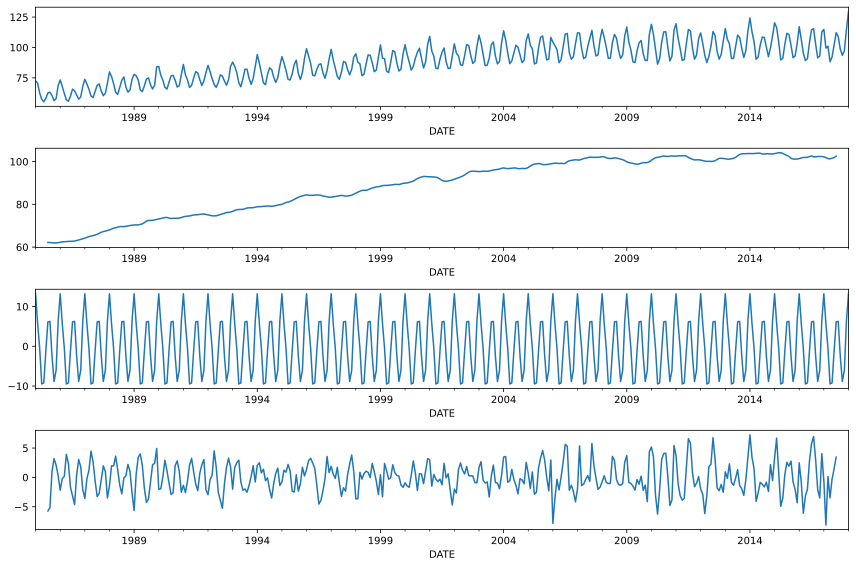

In [6]:
# realiza a decomposição e armazena na variável result
result  = seasonal_decompose(df)

# imprime os componentes da decomposição
# result.plot(observed=True,
            # seasonal=True,
            # trend=True,
            # resid=True,
            # weights=False);

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

# Análise exploratória com séries temporais

Usaremos um dataset contendo os dados de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão.

In [7]:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

# importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

# ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
# verificando os tipos das variáveis
df_trem.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [9]:
# convertendo coluna Datetime para o tipo datetime do python
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# Datetime agora é do tipo datetime64
df_trem.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

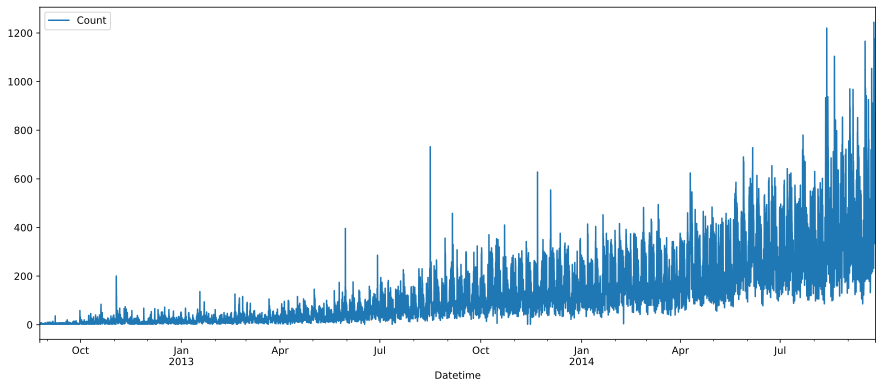

In [10]:
fig, ax = plt.subplots(figsize=(15,6))

df_trem.plot(x="Datetime", y="Count", ax=ax);

Para iniciar uma analise exploratória temos que levantar algumas hipóteses, ou seja, fazer algumas pergunter e tentar responde-las usando os nosso dados.

Algumas dessas perguntas poderiam ser:

* Pessoas viajam mais durante a semana ?
* Há horários de pico por causa das idas e vindas do trabalho?
* Há período de ano onde a demanda por transporte é maior ?

In [11]:
# adicionando uma coluna nova somente com os dados do ano
df_trem["year"] = df_trem.Datetime.dt.year

# verificando as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year
0,0,2012-08-25 00:00:00,8,2012
1,1,2012-08-25 01:00:00,2,2012
2,2,2012-08-25 02:00:00,6,2012
3,3,2012-08-25 03:00:00,2,2012
4,4,2012-08-25 04:00:00,2,2012


In [12]:
# é possivel pegar todos as informações separadamente do datetime

df_trem["month"] = df_trem.Datetime.dt.month
df_trem["day"] = df_trem.Datetime.dt.day
df_trem["hour"] = df_trem.Datetime.dt.hour
df_trem["day_of_week"] = df_trem.Datetime.dt.day_of_week

# verificando as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [13]:
# criando uma nova coluna chamada weekend e atribuindo os valor 0 para toda a coluna
df_trem["weekend"] = 0

# identificando na nova coluna weekend os dias da semana que são sábado e domingo
# caso encontre, atribui o valor 1 para o registro encontrado
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), "weekend"] = 1

# imprimindo as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [14]:
# imprimindo as 5 ultimas entradas
df_trem.tail()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


In [15]:
# verificando a quantidade de registos de são finais de semana ou não
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

### Pessoas viajam mais durante a semana ?

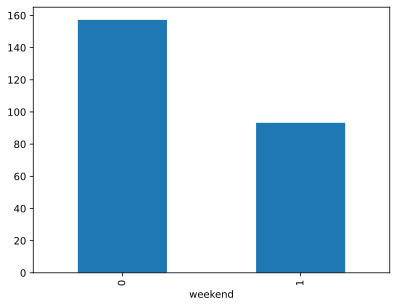

In [16]:
df_trem.groupby("weekend").Count.mean().plot.bar();

A utilização de trem é maior nos dias de semana do que nos finais de semana.

## Há horários de pico por causa das idas e vindas do trabalho?

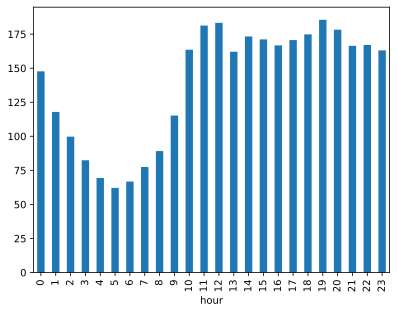

In [17]:
df_trem.groupby("hour").Count.mean().plot.bar();

## Há período de ano onde a demanda por transporte é maior ?

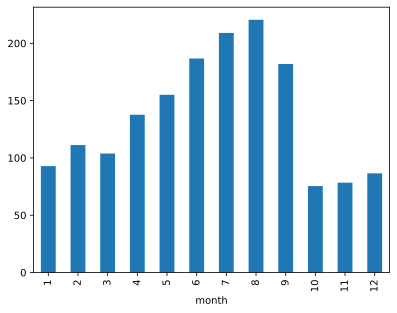

In [18]:
df_trem.groupby("month").Count.mean().plot.bar();

# Técnicas de *Forecasting* para Séries Temporais

In [19]:
# URL do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# carregado o dataset para DataFrame
df = pd.read_csv(dataset_path)

# alterado o tipo da coluna DATE para datetime
df.DATE = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# definindo a coluna DATE como index do DataFrame
df.set_index("DATE", inplace=True)

# imprimindo a 5 primeiras entradas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [20]:
df.tail()

,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


## Naive Approach

Também conhecido como método ingênuo ou baseline. Naive Approach é uma técnica simples de previsão usada em séries temporais.

Ele é considerado ingênuo por que faz suposições bastante simplificadas sobre a série temporal, ingonrando padrões complexos ou informações adicionais.

Basicamente o Naive Approach assume que o próximo valor da série temporal será igual ao último valor observado. Em outras palavras, o último valor da observação é extrapolado para todas a previsões futuras.

<br>
<center>
<img src="https://i.stack.imgur.com/fYq2j.jpg" width="600px">
</center>

No gráfico acima a linha em azul representa o Naive Approach.

Partir da premissa que "o futuro repetirá o passado", mesmo que parece algo ingênuo, serve como um benchmark, um baseline inicial. E por que isso?

Vamos aplicar o Naive Approach usando os nossos dados.

In [21]:
# dividindo nossos dados em treino e validação apenas
# para podemos visualizarmos melhor no gráfico
train = df[df.index <= "2012-8-1"]
valid = df[df.index > "2012-8-1"]

# um novo dataframe para armazenar as previsões
y_hat = valid.copy()

In [22]:
# criando uma nova coluna chamada "naive"
# pegando o último valor observado no dataframe train
# aqui estamos pegando o valor da data de 2012-8-1
# e atribuindo para todos os registros da coluna "naive"
y_hat["naive"] = train.iloc[-1].values[0]

# imprimindo as 5 primeiras entradas
y_hat.head()

,Value,naive
DATE,,
2012-09-01,96.7431,109.8601
2012-10-01,90.3805,109.8601
2012-11-01,94.3417,109.8601
2012-12-01,105.2722,109.8601
2013-01-01,115.5010,109.8601


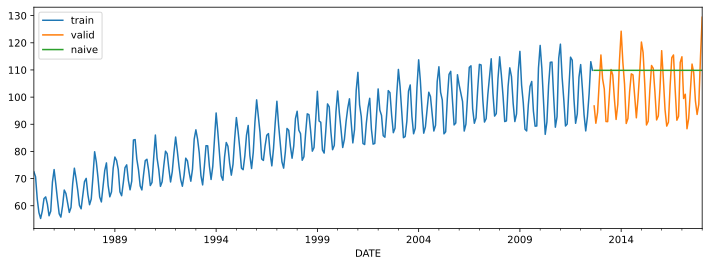

In [23]:
fig, ax = plt.subplots(figsize=(12,4))

train.plot(ax=ax)
valid.plot(ax=ax)
y_hat["naive"].plot(ax=ax)
ax.legend(["train", "valid", "naive"])
plt.show()


Acima podemos visualizar como funciona o Naive Approach, como dito anteriormente, podemos ver a linha verde mostrando o valor constante sendo considero como a previsão futura.

In [24]:
# Calculando o RMSE
print(f"Erro do método Naive Approach: {mean_squared_error(y_hat.Value, y_hat.naive, squared=True)}")

Erro do método Naive Approach: 144.18290826476925


## Média Móvel

O problema do método Naive Approach é que utilizamos somente o último valor registrado, não nos permitindo trabalhar com tendência.

Se tivermos outliers ou se os nossos dados tiverem muita flutuação, utilizar somente um único valor não pode ser uma boa ideia.

A média móvel é um indicador estatístico que é usado para analisar e suavizar os dados em uma série temporal. Ela é calculada através da média de um conjutndo de pontos consecutivos (período da média móvel ou janela de tempo) em uma série de dados, deslocando-se ao longo da série um ponto de cada vez.

Com a média móvel podemos identificar tendências de longo prazo.

In [25]:
# o método rolling do pandas calcula a média em uma janela de tempo
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
y_hat["m7"] = train.Value.rolling(7).mean().iloc[-1]

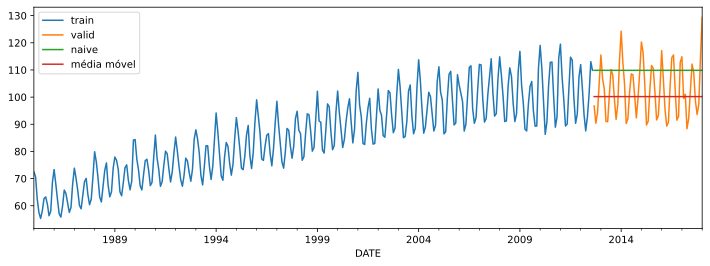

In [26]:
fig, ax = plt.subplots(figsize=(12,4))

train.plot(ax=ax)
valid.plot(ax=ax)
y_hat["naive"].plot(ax=ax)
y_hat["m7"].plot(ax=ax)
ax.legend(["train", "valid", "naive", "média móvel"])
plt.show()

In [27]:
# Calculando o RMSE
print(f"Erro do método Média móvel: {mean_squared_error(y_hat.Value, y_hat.m7, squared=True)}")

Erro do método Média móvel: 101.21254960492308


Perceba que conseguimos diminuir o RMSE de 144 com o Naive Approach para 101 com a média móvel.

## Média exponencial

todo

## Holt's Linear Trend Model

Já o método *Holt's Linear Trend Model* leva em consideração tanto o nível quanto a tendência, e tende a obter melhores resultados do que o Naive Approach e a Média móvel.

Adequado para séries temporais que axibem uma tendência linear, ou seja, um padrão de crescimento ou decrescimento constante ao longo do tempo.

O componente de nível representa o valor médio da série no período atual, enquanto o componente de tendência representa a taxa de crescimento ou decrescimento.

In [28]:
# importando pacotes
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt

Para conseguir identificar um nível ou uma tendência em nossa série temporal podemos usar o *seasonal_decompose* da biblioteca *statsmodels*.

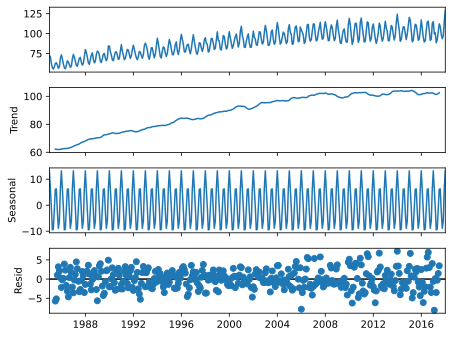

In [29]:
# realiza a decomposição e armazena na variável result
result  = seasonal_decompose(df)

result.plot(observed=True,
            seasonal=True,
            trend=True,
            resid=True,
            weights=False);

Visualmente temos uma tendência de alta.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-30-15338dd9d277>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  y_hat["holt"] = Holt(train.Value).fit(smoothing_level=0.1,
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


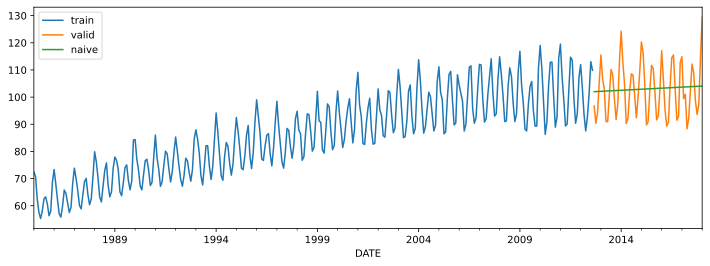

In [30]:
y_hat["holt"] = Holt(train.Value).fit(smoothing_level=0.1,
                                      smoothing_slope=0.1).forecast(len(valid));

# imprimindo no gráfico a nova variável holt
fig, ax = plt.subplots(figsize=(12,4))

train.plot(ax=ax)
valid.plot(ax=ax)
y_hat["holt"].plot(ax=ax)
ax.legend(["train", "valid", "naive"])
plt.show()

In [31]:
# Calculando o RMSE
print(f"Erro do método Holt: {mean_squared_error(y_hat.Value, y_hat.holt, squared=True)}")

Erro do método Holt: 93.79197520557074


Novamente tivemos uma melhora no RMSE de 101 para 93.

## Séries Estacionárias

Séries estacionárias são aquelas em que as propriedades estatísticas básicas permanecem constantes ao longo do tempo.

Quando uma série é estacionária, torna-se mais fácil modelar e prever seus padrões de comportamento, porém, nem todas as séries temporais são estacionárias. Muitas séries reais exibem tendência, sazonalidade e outros padrões que as tornam não estacionárias. Nestes casos, é necessário aplicar técnicas de análise de séries temporais.

**Para aplicar um modelo preditivo é necessário que a série temporal seja estacionária.**

Uma TS (Time Series) é chamado de estácionaria caso possua suas propriedades estatísticas sejam constantes em relação ao tempo, por exemplo:

* Média constante em relação ao tempo;
* Variância constante em relação ao tempo;
* Covariância entre os termos $T_i$ e $T_{i+m}$ é cibstante em relação ao tempo.

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png" width="20%"></center>

E quando a TS não for estácionária ?

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns5-e1536673990684.png" width="50%"></center>

No primeiro plot, há uma tendência de alta, ou seja, a sua média está aumentando conforme o tempo passa. No segundo plot, apesar de não haver uma variação na tendência, a variancia (não constante) está interferindo na sua amplitude. Por fim, o último plot exibe o comportamento típico de quando a covariância varia em função do tempo.

Neste caso é possivel tornar ela estácionária utilizando transformações matemáticas. Mas primeiro precisamos descobrir se a nossa TS é estácionária ou não, vamos verificar isso aplicando testes estatísticos como o ***ADF (Augmented Dickey-Fuller) Test***.





In [32]:
from statsmodels.tsa.stattools import adfuller

df_est = pd.read_csv(dataset_path, index_col=0).squeeze(True)

### Squeeze

Por padrão, quando você usa o read_csv, o Pandas retorna um objeto DataFrame, que é uma estrutura de dados bidimensional, com linhas e colunas, adequada para manipulação e análise de dados tabulares.

No entanto, se você definir squeeze=True, o Pandas pode retornar um objeto Series em vez de um DataFrame, se certas condições forem atendidas. Uma Series é uma estrutura de dados unidimensional semelhante a uma coluna de uma tabela.

O critério para retornar uma Series em vez de um DataFrame é quando o arquivo CSV possui apenas uma coluna de dados.

In [33]:
print(f"Squeeze = False: {type(pd.read_csv(dataset_path, index_col=0).squeeze(False))}")
print(f"Squeeze = True: {type(pd.read_csv(dataset_path, index_col=0).squeeze(True))}")

Squeeze = False: <class 'pandas.core.frame.DataFrame'>
Squeeze = True: <class 'pandas.core.series.Series'>


### Teste de Dickey-Fuller Aumentado (ADF)

É um teste simples que indica se uma série temporal é estácionária ou não. O resultado deste teste é uma estatística de teste e um *p-valeu* associado.

Se o *p-value* for menor que um determinado nível de significância (geralmente 0,05), rejeita-se a hipótese nula de que a série possui raiz unitária e conclui-se que a série é estacionária.



In [34]:
# extrair apenas os valores do dataframe
X = df_est.values

# aplicar o ADF
result = adfuller(X)

# imprimindo o resultado
print(f"Teste estatístico: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print(f"Valores críticos:")
for key, value in result[4].items():
   print(f"\t{key}: {value:.4f}")

Teste estatístico: -2.2570
p-value: 0.1862
Valores críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708


Vamos entender um pouco sobre o que está sendo verificado:

* A hipótese Nula ($H_0$) do teste é que a TS não é estácionária;
* A hipótese Alternativa ($H_1$) rejeita a hipótese nula, ou seja, que a TS é estacionária.

Interpretamos o resultado do teste usando o *p-value* como um *threshold* para trazer indícios suficientes para rejeitarmos a hipótese nula.

Caso o valor do teste fique acima desse *threshold*, falharemos em rejeitar a hpótese nula e manteremos a premissa de que ela não é estácionaria.

Os valores de *threshold* que irei utilizar são:

* $\text{Valor-p } \leq 0.05$: Rejeitamos $H_0$ e a TS é estacionária; e
* $\text{Valor-p } > 0.05$: Falhamos em rejeitar $H_0$ e a TS é não-estacionária.

Os valores críticos indicam os Intervalos de confiança, 1%  significa que temos 99% de certeza que a TS é estácionária. Neste caso nosso valor de teste estatístico está maior do que os valores críticos de 5% e 10%.




# Testes estatísticos e ARIMA

Para transformar uma TS em estacionária, precisamos remover a tendência e a sazonalidade que há nos dados originais.

Uma das técnicas utilizadas é aplicar o $log$ a fim de reduzir a magnitude dos valores da TS. Na sequência, subtraímos a média móvel de um determinado período em relação ao $log$ da TS.

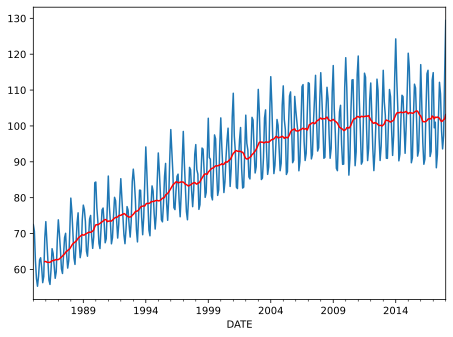

In [35]:
# calculando a média aritmética móvel de 12 meses
ma = df.rolling(12).mean()

# plotando gráfico com dados originais e a média móvel
fig, ax = plt.subplots();
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

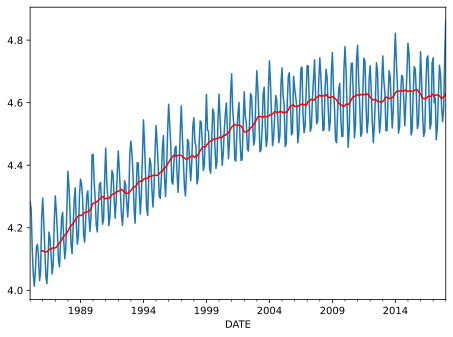

In [36]:
# aplicando log
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

# plotando gráfico
fig, ax = plt.subplots();
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

Veja como reduzimos a escala do eixo Y aplicando o $log$ facilitando o trabalho a partir de agora.

Aplicar o *log* é interessante quando é identificado que temos uma tendência que é exponencial.

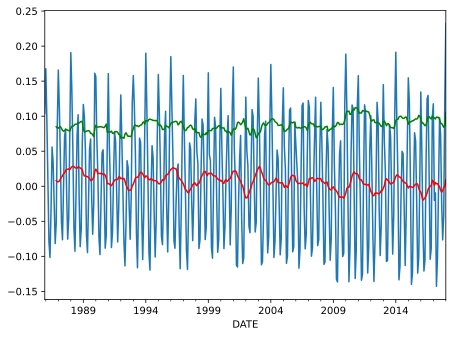

In [37]:
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

# plotando gráfico
fig, ax = plt.subplots();
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, legend=False, color="r")
std_sub.plot(ax=ax, legend=False, color="g")
plt.tight_layout()

Compare visualmente o gráfico acima com o anterior, veja como não temos mais uma tendência de alta e o gráfico está constante ao longo do tempo.

## Repetindo o teste ADF

In [38]:
# extrair apenas os valores do dataframe
X = df_sub.values

# aplicar o ADF
result_sub = adfuller(X)

# imprimindo o resultado
print(f"Teste estatístico: {result_sub[0]:.4f}")
print(f"p-value: {result_sub[1]:.10f}")
print(f"Valores críticos:")
for key, value in result_sub[4].items():
   print(f"\t{key}: {value:.4f}")

Teste estatístico: -5.2116
p-value: 0.0000083256
Valores críticos:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709


Olhando o resultado do teste acima, podemos verificar que a tendência foi removida

Analisando o *p-value* conseguimos rejeitar a ($H_0$) e dizer que nossa TS é estácionária.

## Diferencição

Uma outra técnica simples que ajuda a tornar TS mais estácionária é a diferenciação (subtrair uma coisa pela outra).

### DataFrame.diff()

O método `diff()` calcula a diferença entre o valor atual e o valor anterior ao longo do eixo especificado. Ele retorna uma nova série ou DataFrame contendo essas diferenças. Essa função é útil quando se deseja calcular a variação entre valores consecutivos em um conjunto de dados.

<center><img src="https://www.w3resource.com/w3r_images/pandas-dataframe-diff-1.svg" width="50%"></center>



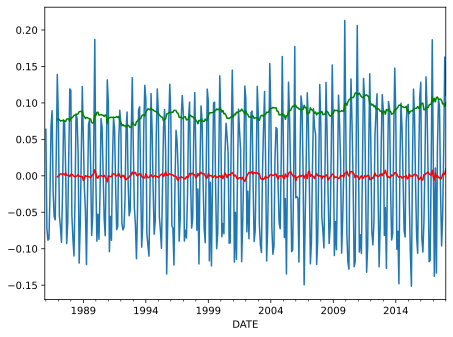

In [39]:
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

# plotando gráfico
fig, ax = plt.subplots();
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color="r")
std_diff.plot(ax=ax, legend=False, color="g")
plt.tight_layout()

Nossa média muito mais estabilizada.

## Repetindo o teste ADF

In [40]:
X = df_diff.dropna().values

# aplicar o ADF
result_diff = adfuller(X)

# imprimindo o resultado
print(f"Teste estatístico: {result_diff[0]:.4f}")
print(f"p-value: {result_diff[1]:.10f}")
print(f"Valores críticos:")
for key, value in result_diff[4].items():
   print(f"\t{key}: {value:.4f}")

Teste estatístico: -7.6511
p-value: 0.0000000000
Valores críticos:
	1%: -3.4483
	5%: -2.8694
	10%: -2.5710


Veja como o valor do teste estatístico diminuiu significativamente.

# Forecasting usando ARIMA

<p align=center>        
<img src="https://drive.google.com/uc?export=view&id=1G7v9sP7acKjGIhEMrrf5WkG9ii21jt6j" width="70%"></p>

ARIMA significa *AutoRegressive Integrated Moving Average* e é uma dos modelos mais usados para fazer previsões em cima de Séries Temporais.

O acrônimo ARIMA significa:

* **AR** (p): *Autoregression*, pois usa a relação de dependência entre uma observação e um número de *lagged observation*.
* **I** (d): *Integrated*, pois usa a diferenciação das observações *raw* para tranformar a TS em estacionária.
* **MA** (q): *Moving Average*, pois usa a dependência entre uma observação e o erro residual proveniente de uma média móvel aplicada a *lagged observations*.

Cada um desses componentes são representados por um parâmetro do modelo. Por esse fato, é muito comum ver a notação ***ARIMA(p, d, q)***.

Para encontrar os parâmetros otimizados de *p*, *d* e *q*, usaremos as funções ACF (Autocorrelação) e PACF (Autorrelação Parcial)

<p align=center>        
<img src="https://drive.google.com/uc?export=view&id=1qFBO-grvVS9wlerzmpmIpA3eqjlqK4iY" width="100%"></p>

Para encontrar os parâmetros otimizados de *p*, *d* e *q*, usaremos as funções ACF (Autocorrelação) e PACF (Autorrelação Parcial).

***ACF*** e ***PACF*** são ferramentas estatísticas usadas na análise de séries temporais, especialemtne na determinação das ordens apropriadas para um modelo **ARIMA**.

##ACF

* A ACF mede a correlação entre uma série temporal e suas próprias versões atrasadas (retardadas) em diferentes intervalos de tempo.
* É calculada para vários valores de defasagem (lag) para determinar como as observações passadas estão correlacionadas com as observações atuais e futuras.
* O gráfico da ACF mostra a correlação entre a série e suas defasagens em vários intervalos de tempo.
* Os picos significativos na ACF podem indicar as defasagens nas quais a série temporal tem correlações significativas.

##PACF

* A PACF também mede a correlação entre a série temporal e suas próprias versões atrasadas, mas controla e elimina a influência das defasagens intermédias.
* A PACF ajuda a identificar os lags que têm correlações diretas e independentes com a observação atual, sem considerar as correlações intermediárias.
* É usado especificamente na determinação da ordem do componente autoregressivo (AR) em um modelo ARIMA.
* Os picos significativos na PACF indicam a ordem do AR no modelo ARIMA.

Ambos são importantes na análise exploratória de séries temporais e na seleção das ordens apropriadas para um modelo ARIMA, juntamente com a função de diferenciação (d) para tornar a série estacionária.







In [41]:
# melhores parâmetros para o nosso modelo
from statsmodels.tsa.stattools import acf, pacf

# df_diff = df_sub.diff(1) # feita somente uma diferenciação

lag_acf = acf(df_diff.dropna(), nlags=25) # retorna um numpy.ndarray
lag_pacf = pacf(df_diff.dropna(), nlags=25) # retorna um numpy.ndarray

Dentro deles temos os limites críticos que vão ajudar a definir os parâmetros *p* e *q* para a função ARIMA.

Estes limites críticos são calculados usando a fórmula $1.96 / \sqrt{(N - d)}$, onde $N$ é o número de pontos do *dataset* e $d$ é o número de vezes que diferenciamos os dados. Ou seja, 5% da autocorrelação (parcial) para TS estacionárias.

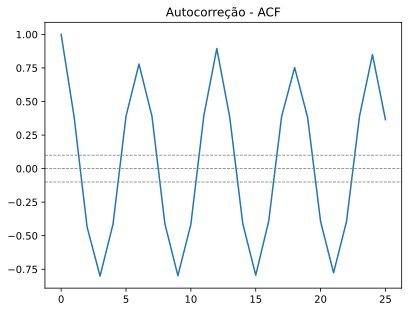

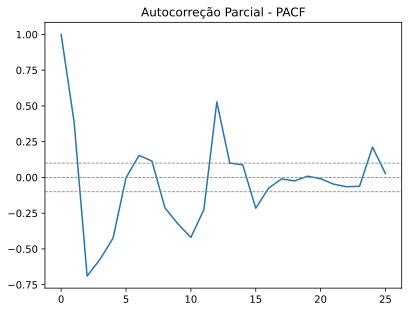

In [42]:
plt.plot(lag_acf)
plt.title("Autocorreção - ACF")

# adicionando uma linha horizontal em y=0
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.8)

# calculando o limite crítico
plt.axhline(y=-1.96 / np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.8) # -1 é por que foi feita somente uma diferenciação (df_sub.diff(1)

# calculando o limite crítico
plt.axhline(y=1.96 / np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.8)  # -1 é por que foi feita somente uma diferenciação (df_sub.diff(1)

plt.show()

plt.plot(lag_pacf)
plt.title("Autocorreção Parcial - PACF")
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.8)

# calculando o limite crítico
plt.axhline(y=-1.96 / np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.8) # -1 é por que foi feita somente uma diferenciação (df_sub.diff(1)

# calculando o limite crítico
plt.axhline(y=1.96 / np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.8)  # -1 é por que foi feita somente uma diferenciação (df_sub.diff(1)
plt.show()

* O valor *q* será o valor onde a linha (azul) da ACF cruza o limite superior do intervalo de confiança (linha tracejada cinza);

* O valor *p* será o valor onde a linha (azul) da PACF cruza o limite superior do intervalo de confiança (linha tracejada cinza);

De maneira mais impírica, podemos dizer que o valor de *q* e *p* são proximadamente 2 (olhando para o eixo X dos plots de ACF e PACF).

# Modelo ARIMA

[Documentação](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)

In [43]:
# importação do pacotes ARIMA
from statsmodels.tsa.arima.model import ARIMA

# instanciando o modelo
model = ARIMA(df_log, order=(2,1,1)) # (p,d,q)

# treinando o modelo
trained_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
# verificando a ultima data para fazer o forecast
df.tail()

,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


Fazendo as previsões a partir de 2018-02-01 até 2019-01-01. Aqui são feitas as previsão usando uma função de plot

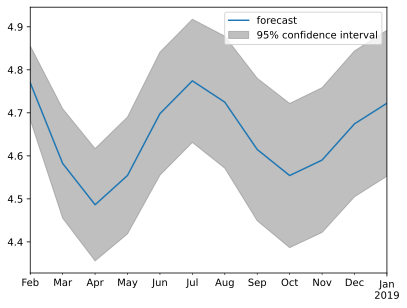

In [45]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()
plot_predict(trained_model, start="2018-02-01", end="2019-01-01", ax=ax)
plt.show()

Aqui é utilizada uma função *predict* padrão para podermos ver os valores em forma de DataFrame.

In [46]:
# realizando as previsões
df_pred = trained_model.predict(start="2018-02-01", end="2019-01-01").to_frame(name="Value")

# atribuindo nome ao index
df_pred.index.name = "DATE"

# imprimindo  as 5 primeiras linhas
df_pred.head()

,Value
DATE,
2018-02-01,4.769731
2018-03-01,4.582231
2018-04-01,4.486300
2018-05-01,4.554415
2018-06-01,4.698068


In [47]:
# calculando o inverso do np.log
np.exp(df_pred)

,Value
DATE,
2018-02-01,117.887506
2018-03-01,97.732178
2018-04-01,88.792265
2018-05-01,95.051121
2018-06-01,109.734940
2018-07-01,118.431254
2018-08-01,112.698384
2018-09-01,100.959638
2018-10-01,95.030488


# Referências

* https://towardsdatascience.com/forecasting-with-holts-linear-trend-exponential-smoothing-af2aa4590c18
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
* https://people.duke.edu/~rnau/whatuse.htm
* https://www.slideshare.net/ElegantJ-BusinessIntelligence/what-is-arima-forecasting-and-how-can-it-be-used-for-enterprise-analysis
* https://stackoverflow.com/questions/73112516/arimaresults-object-has-no-attribute-plot-predict-error